# 지도학습 기본 실습 
- titanic-clean 데이터 

## 데이터 준비 

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./data/titanic_clean.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    float64
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Gender_num    891 non-null    int64  
 13  Embarked_num  891 non-null    int64  
 14  E_C           891 non-null    int64  
 15  E_Q           891 non-null    int64  
 16  E_S           891 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 118.5+ KB


In [7]:
df['Pclass'] = df['Pclass'].astype(int)
df['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [8]:
df['Age'] = df['Age'].astype(int)
df['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

In [9]:
df['Age'].value_counts().sort_values(ascending=False).head(20)

Age
29    197
24     31
22     27
28     27
30     27
18     26
19     25
21     24
36     23
25     23
32     20
26     18
27     18
35     18
16     17
31     17
20     16
34     16
23     16
33     15
Name: count, dtype: int64

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    int64  
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Gender_num    891 non-null    int64  
 13  Embarked_num  891 non-null    int64  
 14  E_C           891 non-null    int64  
 15  E_Q           891 non-null    int64  
 16  E_S           891 non-null    int64  
dtypes: float64(1), int64(11), object(5)
memory usage: 118.5+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_num,Embarked_num,E_C,E_Q,E_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.303030,29.544332,0.523008,0.381594,32.204208,0.647587,1.536476,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.833418,13.013778,1.102743,0.806057,49.693429,0.477990,0.791503,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,2.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,1.000000,1.000000,1.000000


## EDA : 데이터 시각화로 탐색하기 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S,1,2,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,0,2,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,B96 B98,S,0,2,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1,0,1,0,0


In [16]:
# 분석을 위한 데이터를 범위로 추출 
df_eda = df.loc[:, 'PassengerId' : 'Embarked']
df_eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


In [17]:
# 분석을 위한 데이터를 특정 컬럼지정으로 추출
df_eda2 = df.loc[:, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender_num', 'Embarked_num']]
df_eda2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_num,Embarked_num
0,0,3,22,1,0,7.2500,1,2
1,1,1,38,1,0,71.2833,0,0
2,1,3,26,0,0,7.9250,0,2
3,1,1,35,1,0,53.1000,0,2
4,0,3,35,0,0,8.0500,1,2


<Axes: >

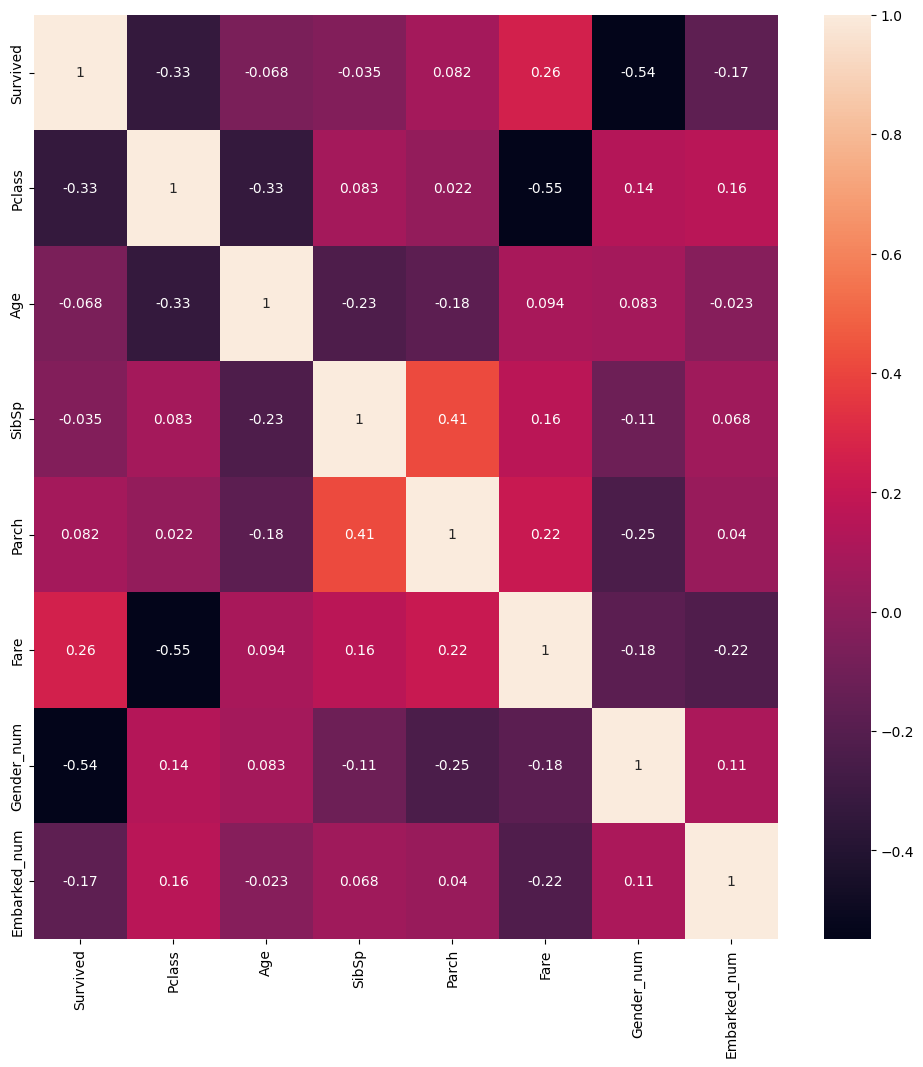

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df_eda2.corr(), annot=True)

<Axes: >

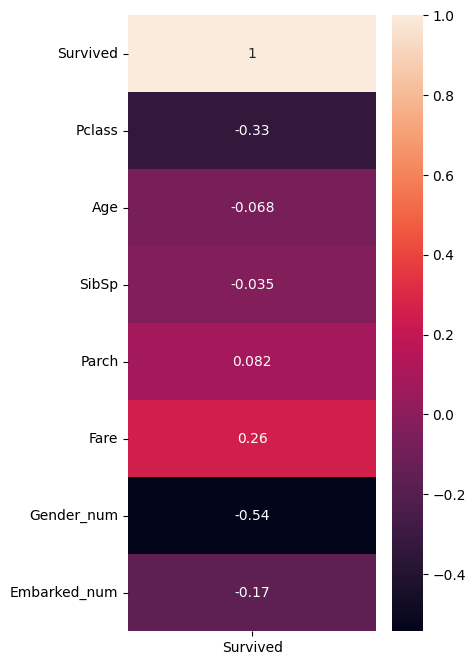

In [19]:
plt.figure(figsize=(4,8))
sns.heatmap(df_eda2.corr()[['Survived']], annot=True)

In [20]:
df_eda2['Pclass'].value_counts().sort_values(ascending=False)

Pclass
3    485
1    215
2    191
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Count'>

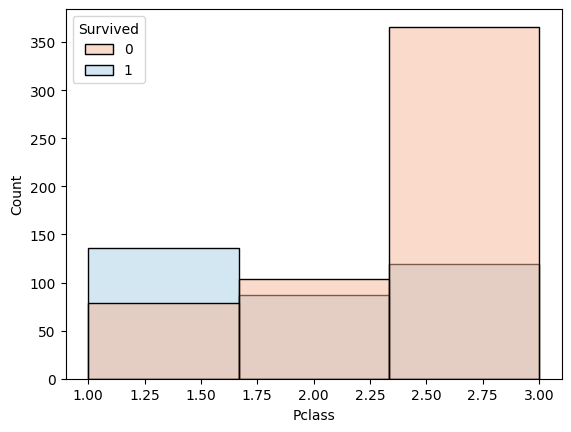

In [21]:
# 좌석 등급과 생존과의 관계
sns.histplot(data=df_eda, x="Pclass", hue='Survived', bins=3, palette='RdBu')

<Axes: xlabel='Sex', ylabel='Count'>

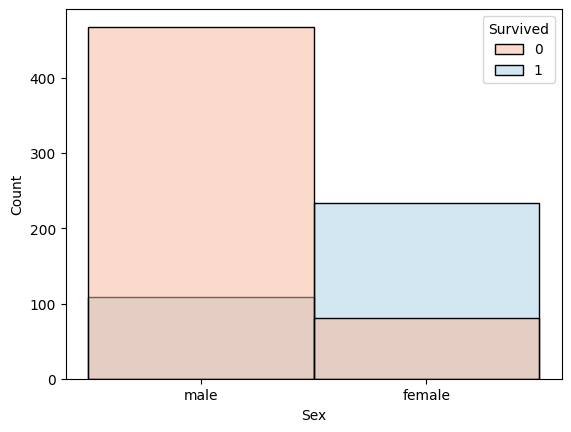

In [22]:
# 성별과 생존과의 관계를 histplot()
sns.histplot(data=df_eda, x="Sex", hue='Survived', bins=2, palette='RdBu')

<Axes: xlabel='Age', ylabel='Count'>

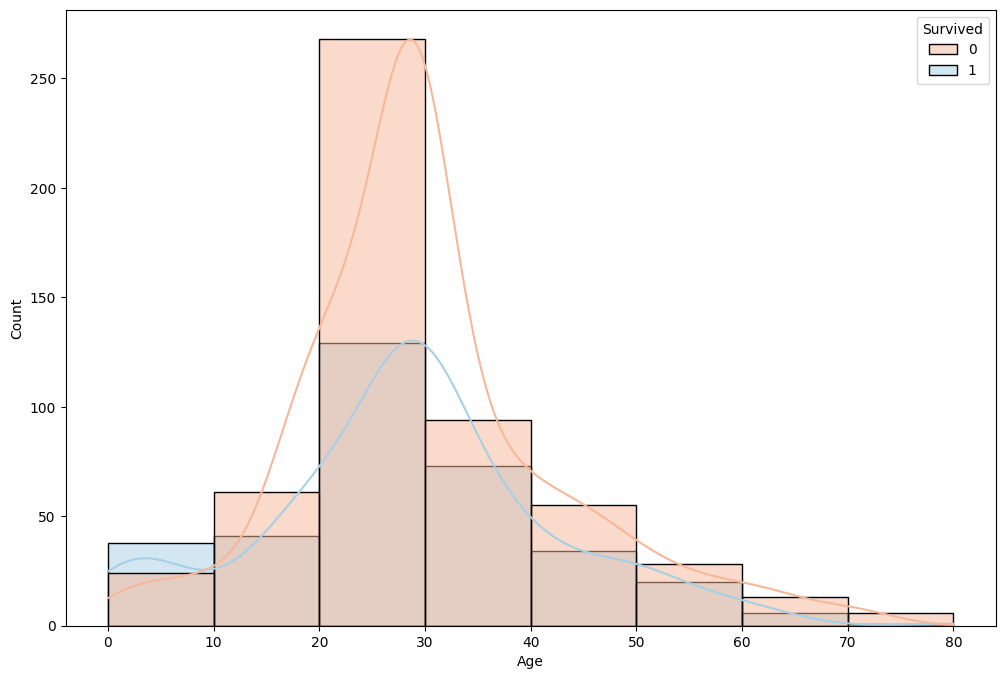

In [23]:
# 나이와 생존과의 관계를 histplot()
plt.figure(figsize=(12,8))
sns.histplot(data=df_eda, x="Age", hue='Survived', bins=8, palette='RdBu', kde=True)

In [24]:
# 탑승항구에 따른 탑승자수 카운트
df_eda['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='Count'>

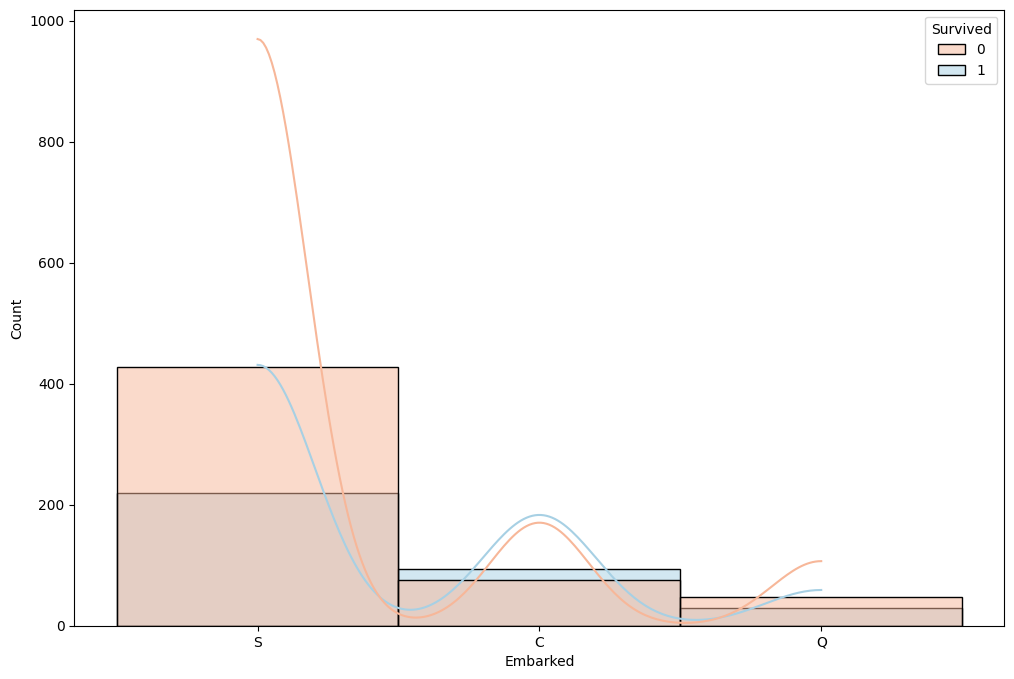

In [25]:
# 탑승항구에 따른 생존자 현황
plt.figure(figsize=(12,8))
sns.histplot(data=df_eda, x="Embarked",hue='Survived', palette='RdBu', kde=True)

<Axes: xlabel='Age', ylabel='count'>

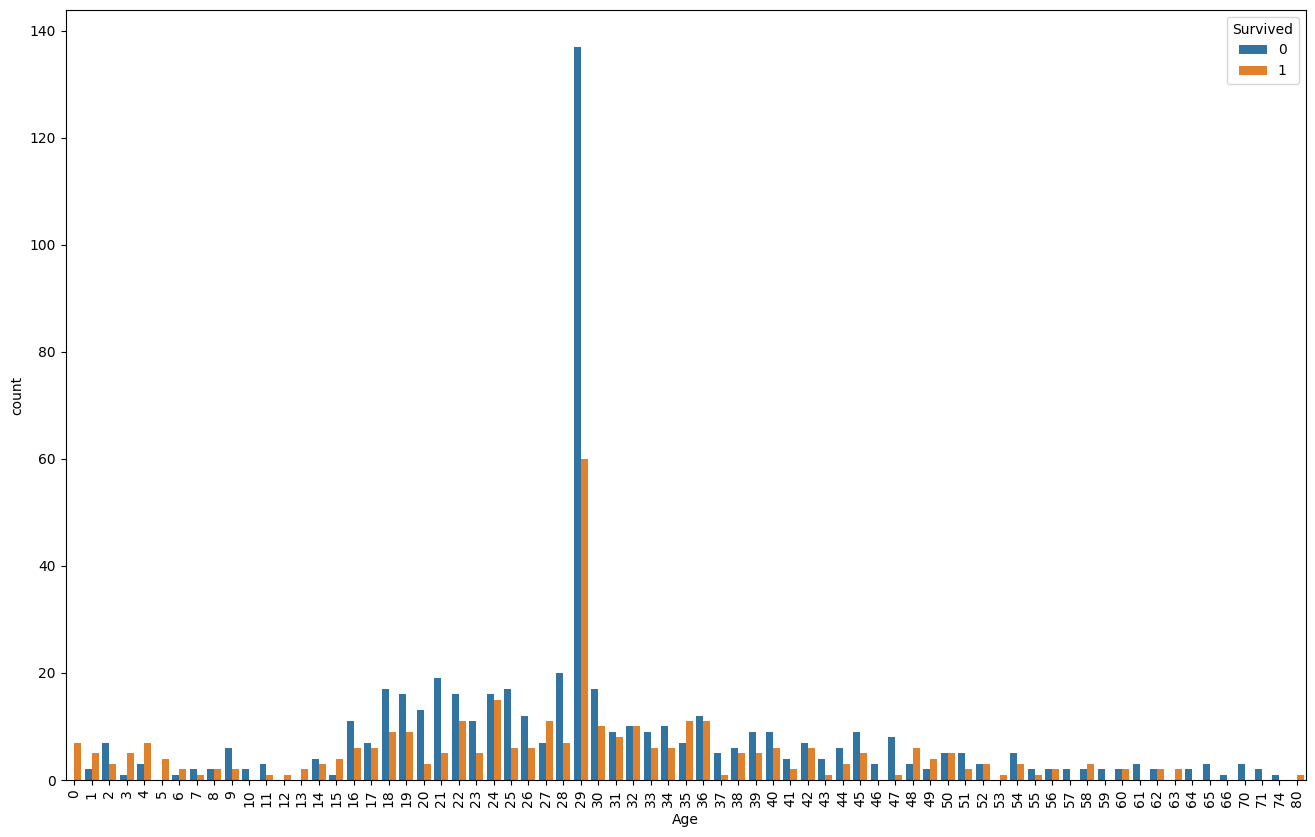

In [26]:
# 'Age'컬럼의 value별로 카운트하여 시각화
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(data=df_eda, x='Age',  hue='Survived')

## 특징 데이터(X, feature)와 정답 데이터(y, target) 분할

1. feature(X), target(y)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [29]:
# 머신러닝에 사용할 특징 데이 추출
#features = ['Pclass','Gender_num', 'Age', 'Fare', 'Embarked_num']
features = ['Pclass','Gender_num', 'Age', 'Fare', 'E_C', 'E_Q', 'E_S' ]
data_X = df[features]
data_X

,Pclass,Gender_num,Age,Fare,E_C,E_Q,E_S
0,3,1,22,7.2500,0,0,1
1,1,0,38,71.2833,1,0,0
2,3,0,26,7.9250,0,0,1
3,1,0,35,53.1000,0,0,1
4,3,1,35,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2,1,27,13.0000,0,0,1
887,1,0,19,30.0000,0,0,1
888,3,0,29,23.4500,0,0,1
889,1,1,26,30.0000,1,0,0


In [30]:
# target(y, label) 데이터 추출
data_y = df['Survived']
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
data_X.shape, data_y.shape

((891, 7), (891,))

## 학습 데이터와 테스트 데이터 분할
- 학습 데이터(X_train, y_train), 테스트 데이터(X_test)
- test_y : 성능 평가시 y_predict와 비교 평가  
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.model_selection import train_test_split

train_test_split(data_X, data_y, test_size=0.25, shuffle=True, random_state : 42)

- test_size: validation set에 할당할 비율 (20% -> 0.2), 기본 0.25(25%)
- shuffle: 데이터를 섞어서 분할, 셔플 옵션 (기본 True)
- random_state: 랜덤 시드값

In [33]:
# 중요 : X_train, X_test, y_train, y_test = train_test_split(data_X, data_y)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=2025)

In [34]:
print(X_train.shape, y_train.shape)

(668, 7) (668,)


In [35]:
print(X_test.shape, y_test.shape)

(223, 7) (223,)


In [36]:
X_train['Pclass'].value_counts()

Pclass
3    364
1    159
2    145
Name: count, dtype: int64

In [37]:
y_train.value_counts()

Survived
0    421
1    247
Name: count, dtype: int64

## 머신러닝 모델 학습하기 
- Stochastic Gradient Desscent(SGD) : 확률적 경사하강법

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
model_sgdc = SGDClassifier()

In [40]:
# 모델 학습
model_sgdc.fit(X_train, y_train)

SGDClassifier()

## 학습모델 테스트

In [41]:
y_pred = model_sgdc.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

In [42]:
y_test.to_numpy()

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0])

## 성능평가

In [43]:
import numpy as np 
np.unique((y_pred == y_test), return_counts = True)

(array([False,  True]), array([ 80, 143]))

In [44]:
import numpy as np 
np.unique((y_pred == y_test), return_counts = False)

array([False,  True])

In [59]:
_,r_cnt = np.unique((y_pred == y_test), return_counts = True)
r_cnt

array([126,  97])

In [60]:
#정확도 평가 
r_cnt[1] / (r_cnt[0]+r_cnt[1])

np.float64(0.4349775784753363)

In [61]:
(y_pred == y_test).mean()

np.float64(0.4349775784753363)

In [62]:
from sklearn.metrics import accuracy_score
print('예측 정확도 : %.4f' %accuracy_score(y_pred, y_test))

예측 정확도 : 0.4350


In [63]:
# 정밀도(precision), 재현율(recall), 정확도(accuracy)
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.03      0.67      0.06         6
           1       0.98      0.43      0.60       217

    accuracy                           0.43       223
   macro avg       0.51      0.55      0.33       223
weighted avg       0.95      0.43      0.58       223



## 학습모델 
- 최적의 가설함수를 만드었다. 에러(정답(y)-예측(y_pred))가 최소인 함수를 찾음
- w(기울기), b(y절편) 찾음

In [65]:
model_sgdc.coef_.shape

(1, 7)

In [66]:
# w : 기울기
model_sgdc.coef_

array([[ -58.72059109, -503.20824422,   20.99941668,   18.58794478,
          84.7754229 ,   68.05366518,  -41.60995528]])

In [67]:
# 절편
model_sgdc.intercept_

array([191.73344165])

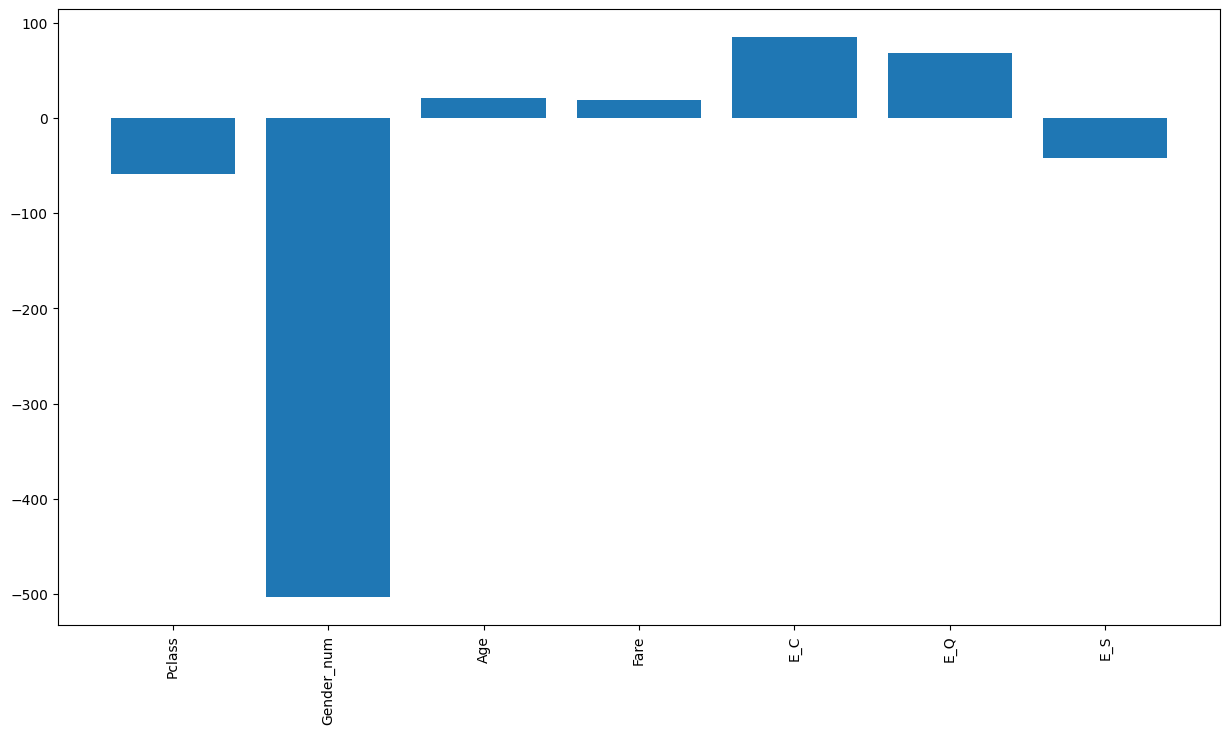

In [68]:
# sgd 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(X_train.columns, model_sgdc.coef_[0,:])
plt.xticks(rotation=90)
plt.show()

In [69]:
coef_df = pd.DataFrame(zip(X_train.columns, model_sgdc.coef_[0,:])).sort_values(by=1, ascending=False)
coef_df

,0,1
4,E_C,84.775423
5,E_Q,68.053665
2,Age,20.999417
3,Fare,18.587945
6,E_S,-41.609955
0,Pclass,-58.720591
1,Gender_num,-503.208244


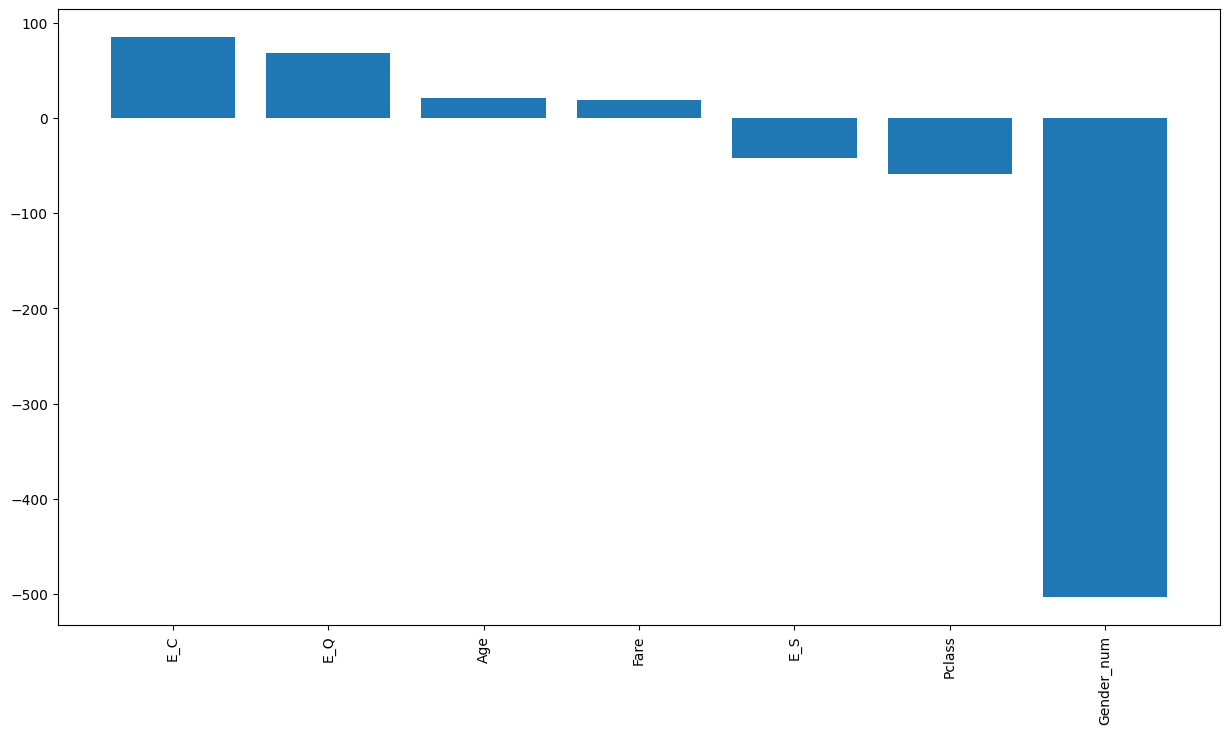

In [70]:
# sgd 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(coef_df[0], coef_df[1])
plt.xticks(rotation=90)
plt.show()